# SVM (Support Vector Machine)

* Its a machine learning algorithm used for classification and regression task.
* The primary objective of SVM is to find a hyperplane that best separates data points of different classes. 
* Here's a breakdown of key concepts and workings of SVM:

Key Concepts:
1. Hyperplane:

In a two-dimensional space, a hyperplane is a line that separates the data into different classes.
In higher dimensions, it's a plane or a subspace.

2. Support Vectors:

Support vectors are the data points closest to the hyperplane. They play a crucial role in defining the hyperplane.

3. Margin:

The margin is the distance between the hyperplane and the nearest data point from either class.
SVM aims to maximize this margin, leading to a robust and well-generalized model.

4. Kernel Trick:

SVM can efficiently handle non-linear decision boundaries by transforming the input features into higher dimensions using a kernel function.
Common kernels include linear, polynomial, radial basis function (RBF), and sigmoid.

![Alt text](images/image1.png)

## Formula: 

* Line Formula: `ax + by + c = 0`
* Generic Formula for hiper Plain: `W^t x + b = 0`

Margin above the hyperplain will be always positive and Margin below hyperplain will be always negative

## Working of SVM:

1. Binary Classification:

Given a set of labeled data points belonging to two classes, SVM finds the hyperplane that best separates them.
The hyperplane is chosen to maximize the margin, i.e., the distance between the hyperplane and the closest data point of either class.

The equation of a hyperplane in a two-dimensional space is given by:  
`w⋅x−b=0`  
where:  
w is the weight vector (normal to the hyperplane),  
x is the input feature vector,  
b is the bias term.

2. Soft Margin SVM:

In some cases, data may not be linearly separable. SVM introduces the concept of a "soft margin" by allowing some misclassification.
The trade-off between maximizing the margin and minimizing misclassification is controlled by a regularization parameter (C).

in cases where the data is not perfectly separable, a "soft margin" is introduced. The optimization problem becomes:

minimize 1/2 ∥w∥^2 +C∑(i=1)(N) ξi


3. Multi-Class Classification:

SVM, by nature, is a binary classifier. However, it can be extended to handle multiple classes using techniques like one-vs-one or one-vs-all.  
Formula: f(x)=sign( ∑(i=1)(N) αi * yi K(x,xi)−b)  
where:  
K(x,xi) is the kernel function, representing the inner product in a higher-dimensional space,  
αi are the Lagrange multipliers.  

4. Regression (Support Vector Regression):

SVM can also be used for regression tasks. In this case, the goal is to fit as many instances as possible within a specified margin.  
minimize 1/2 ∥w∥^2 +C∑(i=1)(N) (ξi + ξi*)


### Hyper parameters in SVM:

* C (Regularization Parameter):

Definition: C is the regularization parameter, also known as the cost parameter. It controls the trade-off between having a smooth decision boundary and classifying the training points correctly.
Effect:
Smaller values of C lead to a softer margin, allowing some misclassifications. The model prioritizes a smoother decision boundary.
Larger values of C result in a harder margin, where the model aims to classify all training points correctly, possibly leading to overfitting if C is too large.


* Kernel:

Definition: The kernel function is a mathematical function that transforms the input data into a higher-dimensional space. The transformed data allows for the creation of non-linear decision boundaries in the original input space.
Effect:
Linear Kernel (kernel='linear'): It creates a linear decision boundary in the original input space. Suitable when the relationship between features and the target is approximately linear.
Radial Basis Function (RBF) Kernel (kernel='rbf'): This is a popular choice for non-linear problems. It introduces non-linearity by mapping data into a higher-dimensional space.
Polynomial Kernel (kernel='poly'): Similar to the RBF kernel but uses a polynomial function for mapping.


* Gamma:

Definition: Gamma is a parameter for the RBF, poly, and sigmoid kernels. It defines how far the influence of a single training example reaches.
Effect:
Small values of gamma lead to a broader decision boundary, making the model more tolerant to variations in the data.
Large values of gamma result in a more concentrated decision boundary, making the model sensitive to fine details in the data.


#### In Simple Terms:

*  C: Think of C as a parameter that regulates how much the SVM should adhere to the training data. Smaller C values allow more errors, while larger C values force the model to get more training points correct.

* Kernel: It's like choosing a lens through which you view your data. Linear is like looking at it straight on, RBF allows you to see non-linear patterns, and polynomial gives a mix of both.

* Gamma: Imagine a spotlight. A small gamma means the spotlight is broad, covering more area, while a large gamma means the spotlight is narrow, focusing on finer details.

# Practical Implementation

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality , I just shared it to kaggle for convenience. (If I am mistaken and the public license type disallowed me from doing so, I will take this down if requested.)

Content

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
* fixed acidity : most acids involved with wine or fixed or nonvolatile
* volatile acidity : the amount of acetic acid in wine
* citric acid : the amount of citric acid in wine
* residual sugar : the amount of sugar remaining after fermentation stops
* chlorides	: the amount of salt in the wine.
* free sulfur dioxide : the amount of free sulfur dioxide in the wine(those available to react and thus exhibit both germicidal and antioxidant properties)
* total sulfur dioxide : amount of free and bound forms of SO2
* density : the measurement of how tightly a material is packed together
* PH : describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4
* Alcohol : the percent alcohol content of the wine
* quality : output variable (based on sensory data, score between 3 and 8)

Dataset Link: https://www.kaggle.com/code/nimapourmoradi/red-wine-quality

## Import Library

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Ingestion

In [30]:
df = pd.read_csv("data/winequality-red.csv")

## Data Information

In [31]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [33]:
df.shape

(1599, 12)

**Finding:** There are total 1599 rows and 12 columns, out of which one column is target column

In [34]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Findings:** There are no Null values

In [35]:
# Check duplicate rows
df.duplicated().sum()

240

In [36]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


**Finding:** There are total 240  duplicare records.  
Here we are not going to Drop the data, as we have just 1599 records and dropinng 240 rows can affect the model training process. In this situation we are going to keep the messing records.

In [37]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**Finding:** We dont have any String column

In [38]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [39]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

**Finding:** There is just one categorical column "Quality" and all other data are continous data.

## EDA

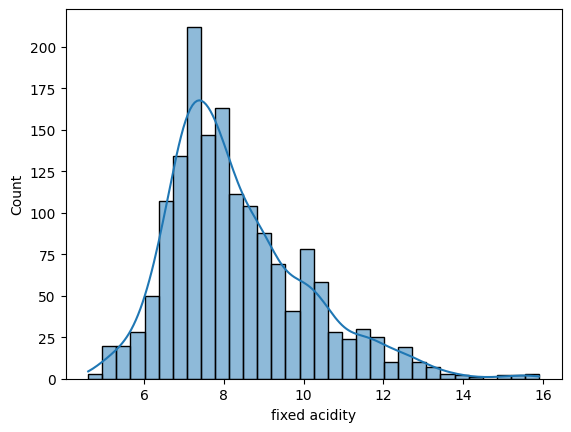

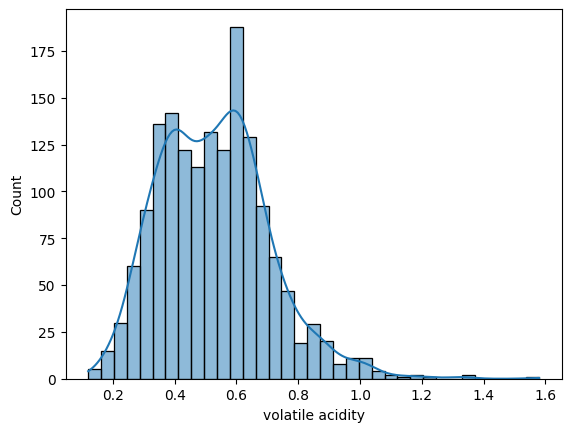

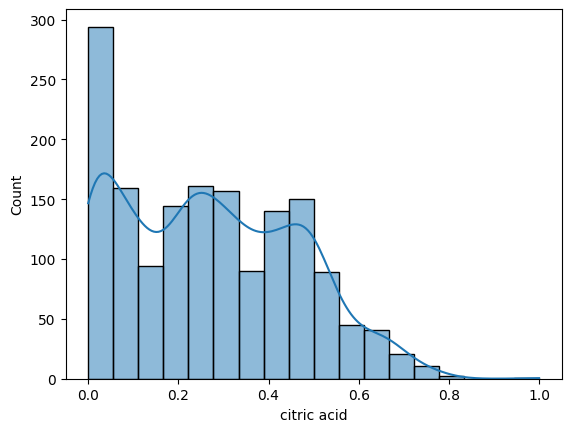

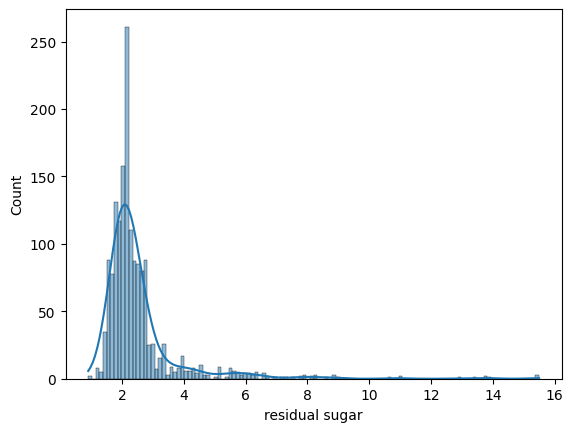

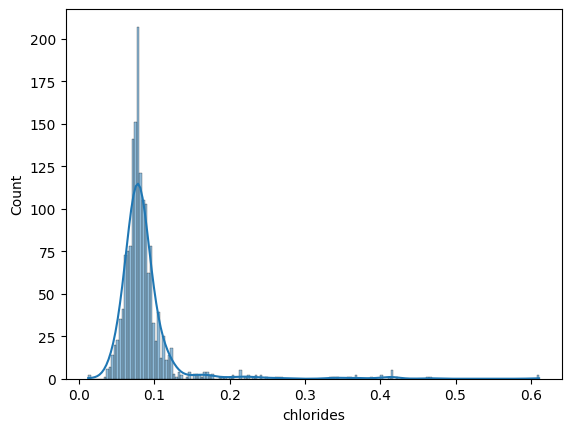

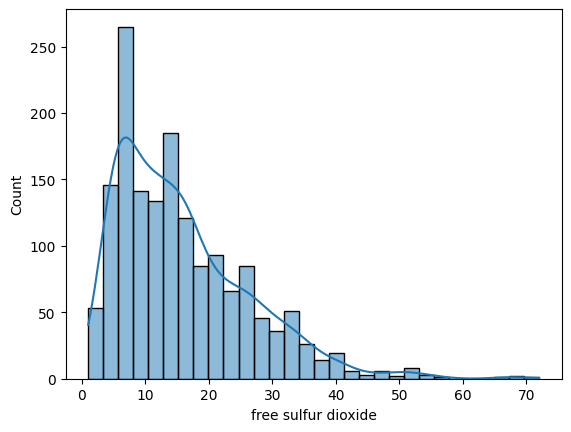

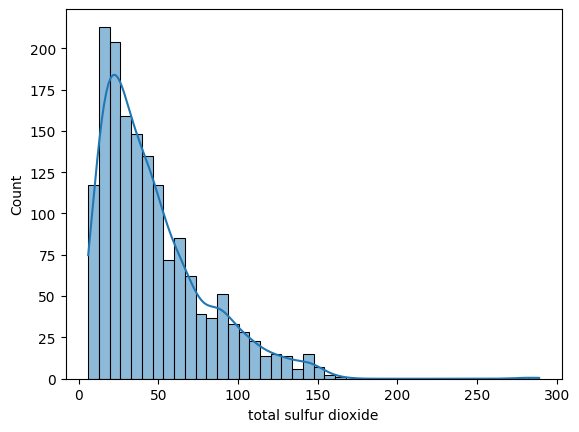

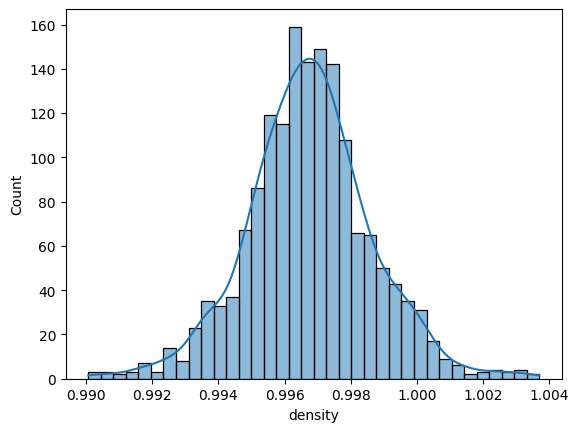

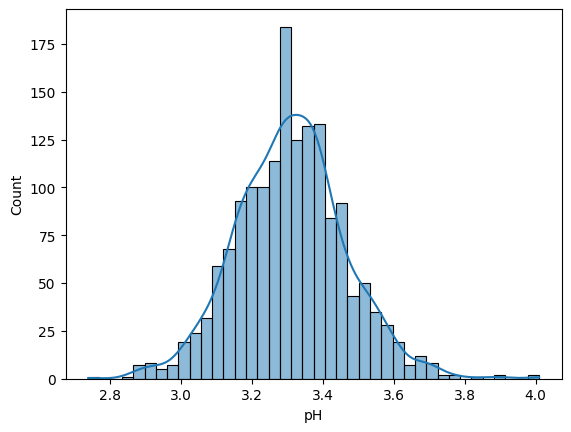

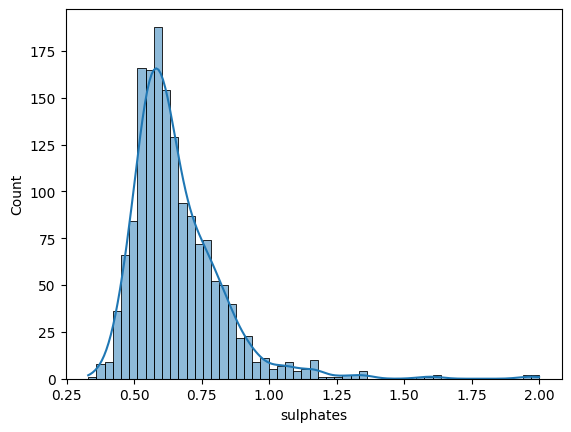

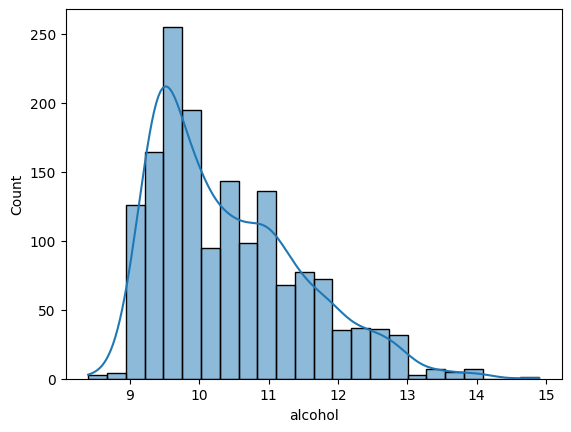

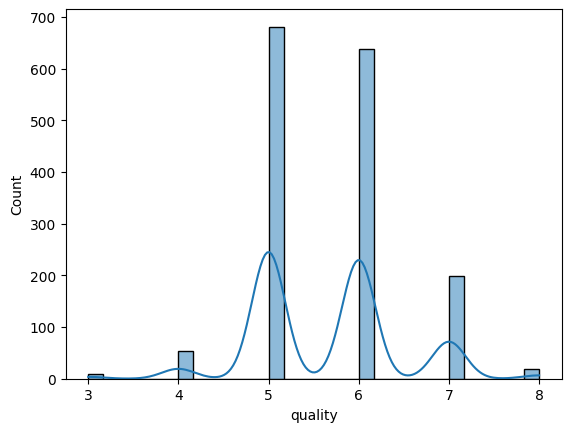

In [40]:
for col in df.columns:
    sns.histplot(df, x=col, kde=True)
    print('\n')
    plt.show()

<Axes: >

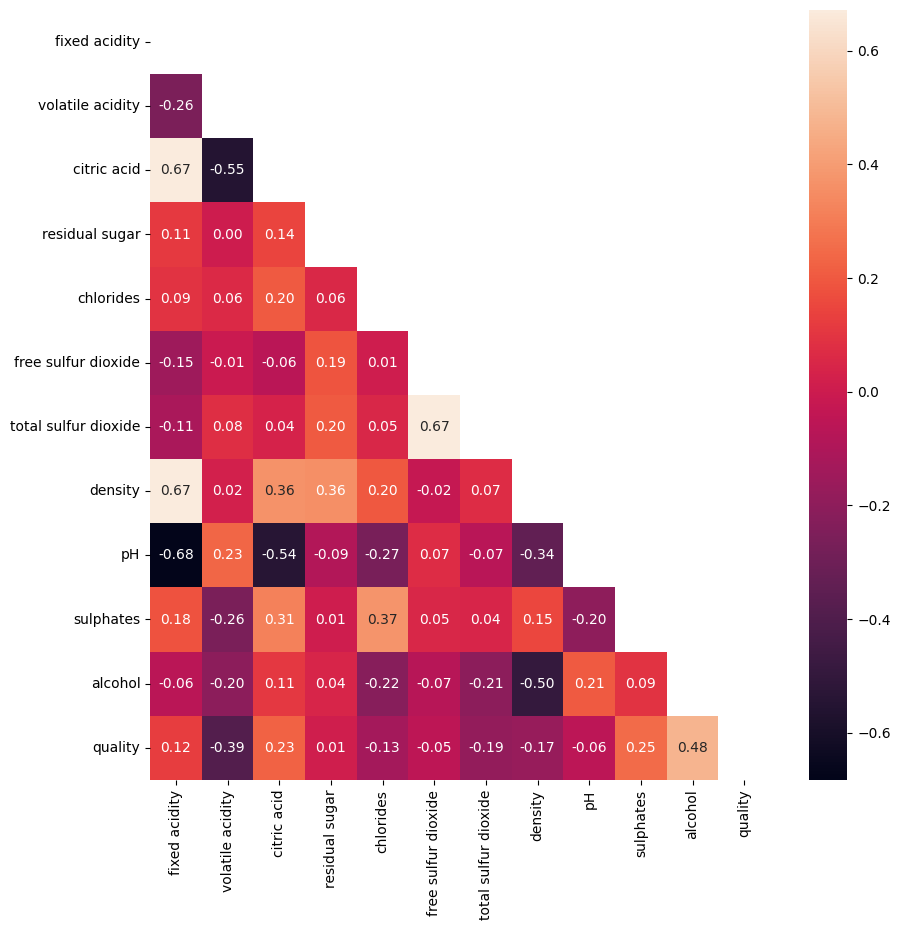

In [41]:
# Find the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', mask=np.triu(df.corr()))

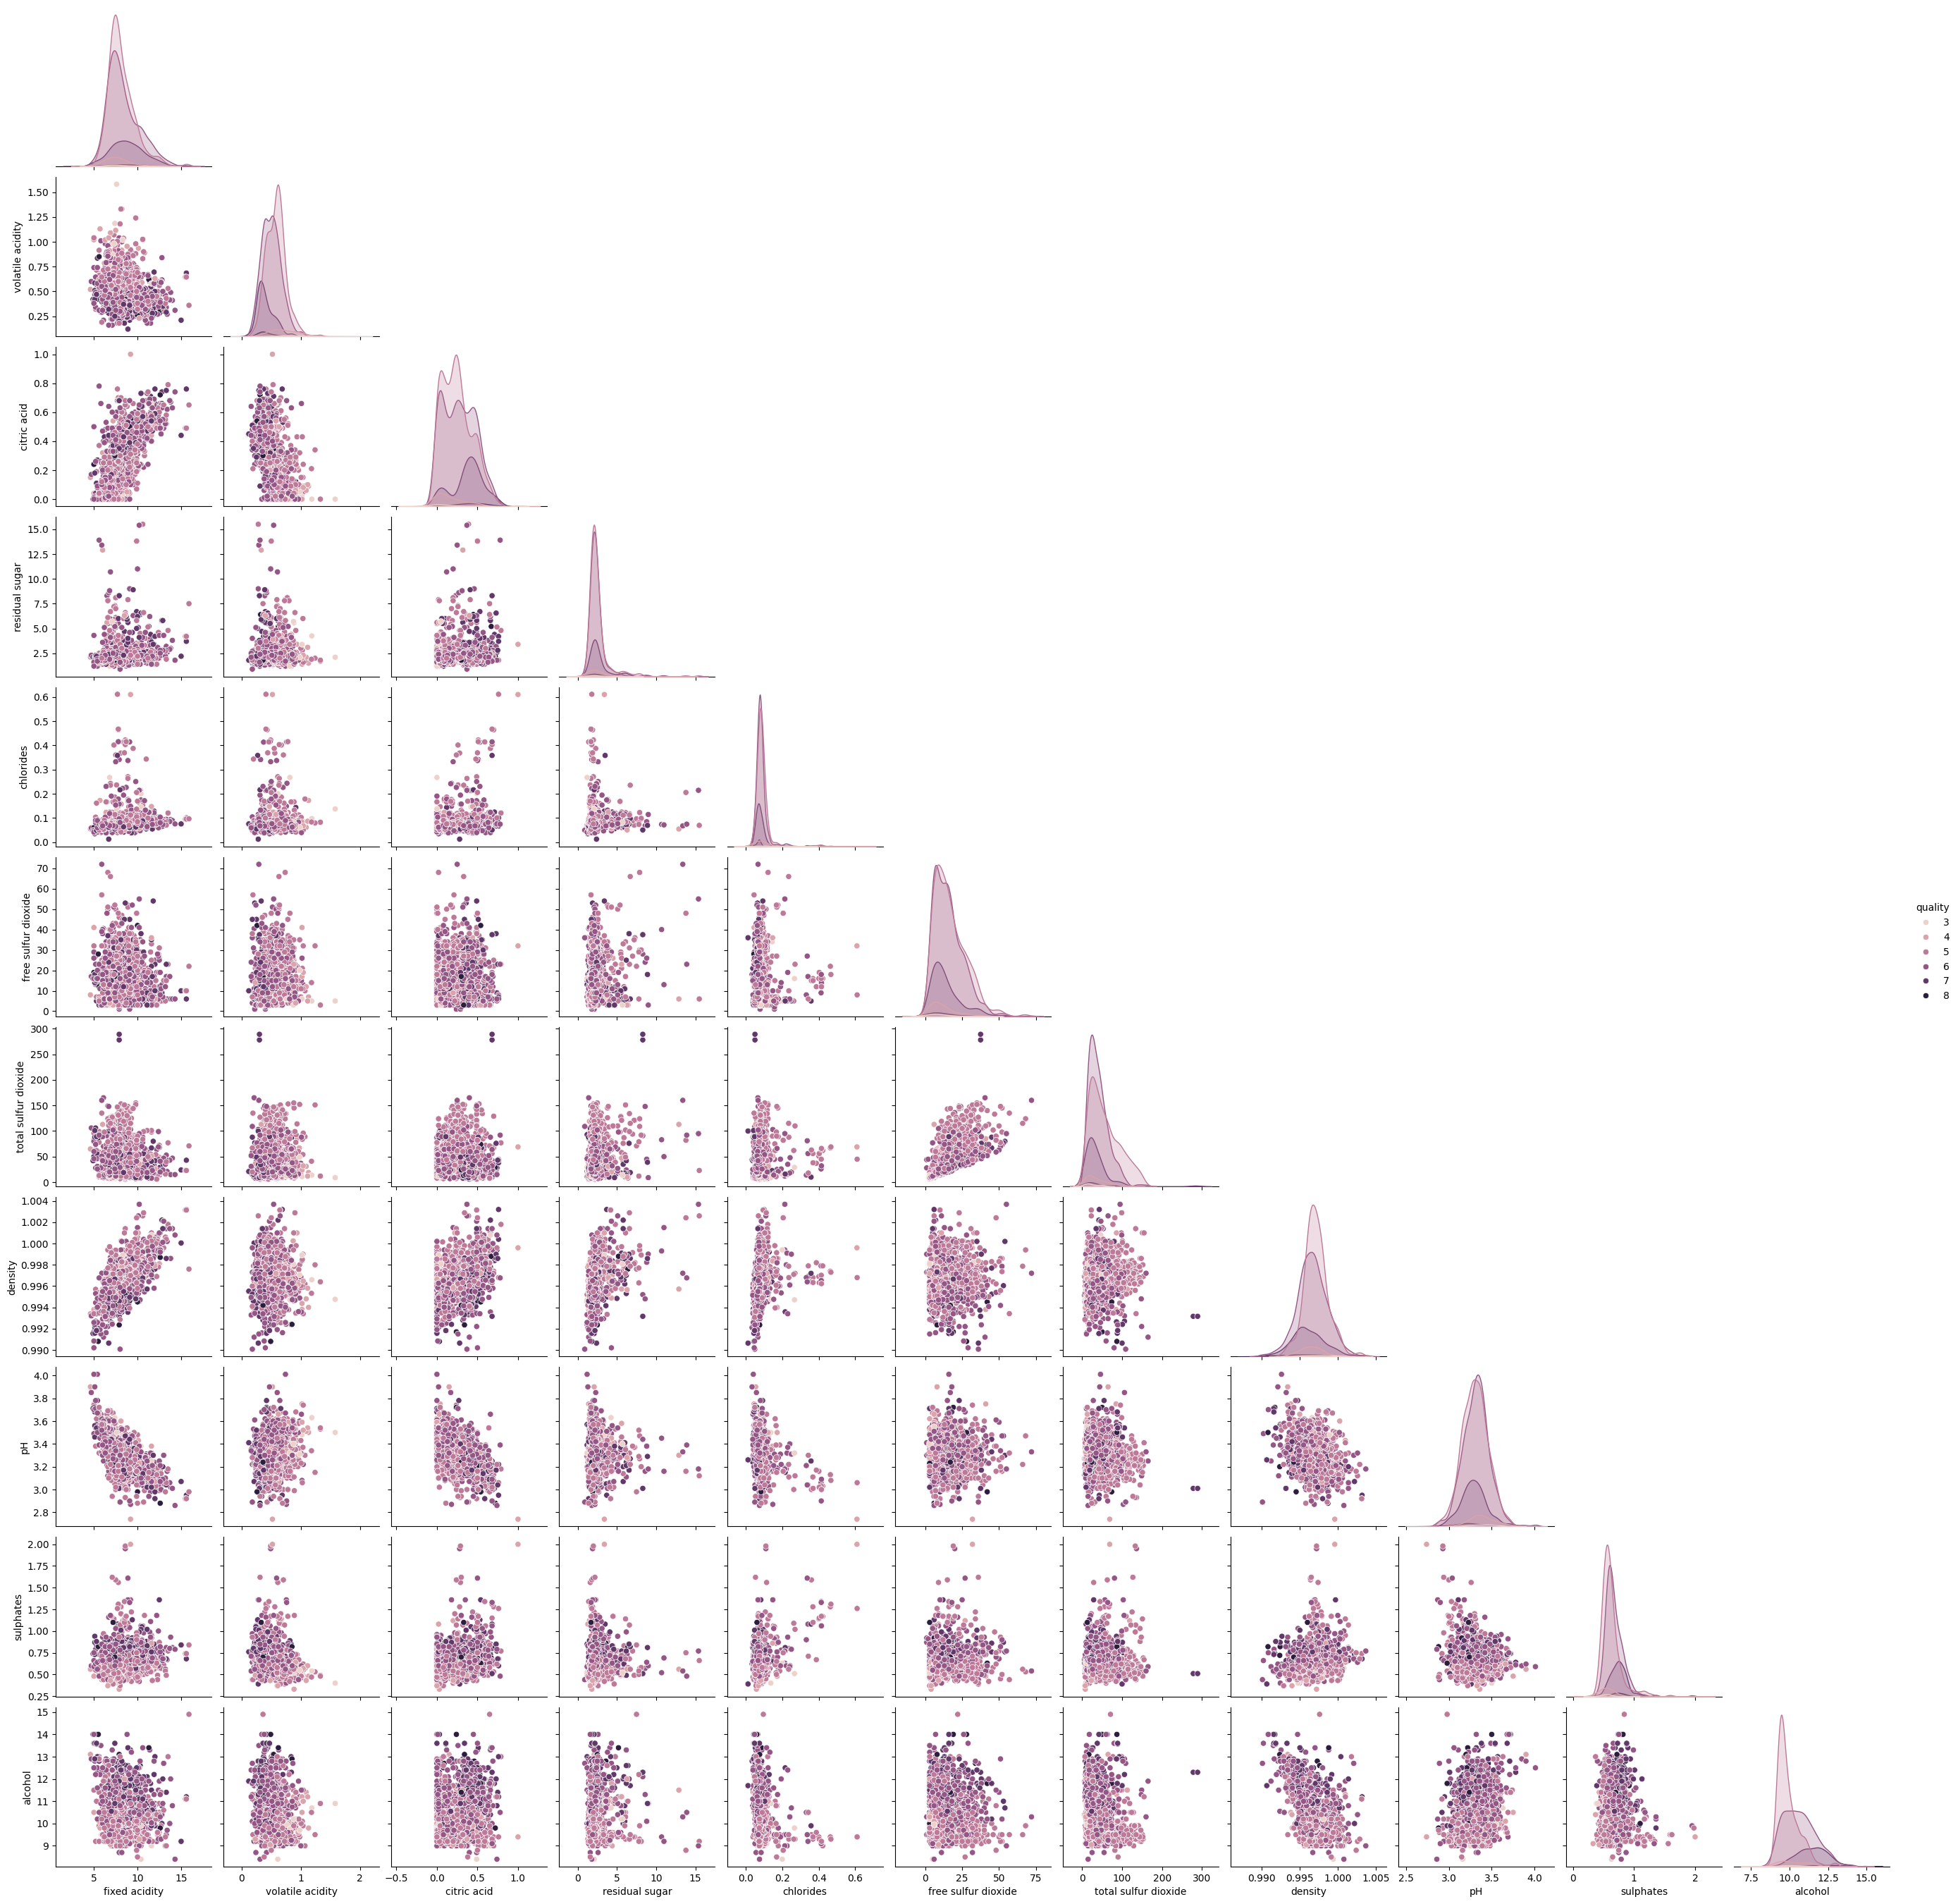

In [42]:
sns.pairplot(df, hue = 'quality', corner=True)

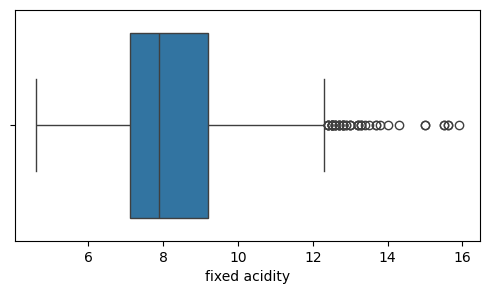

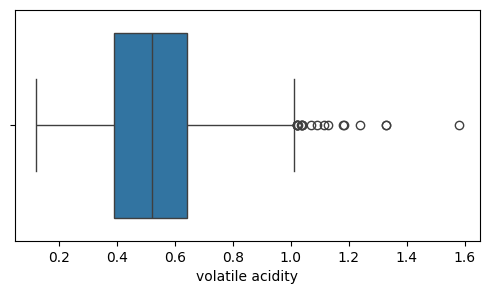

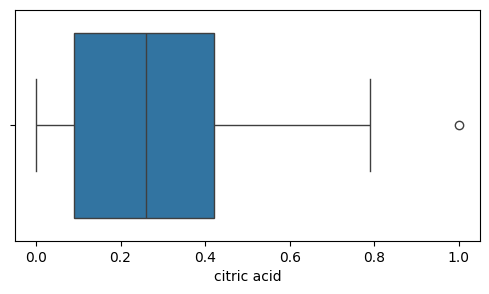

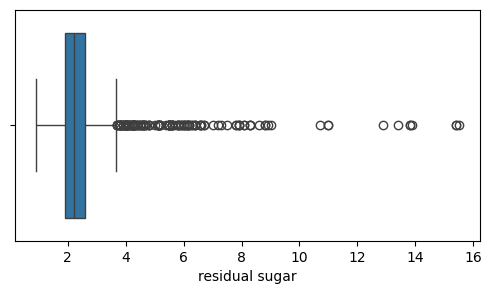

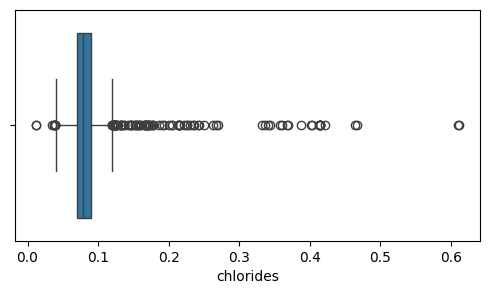

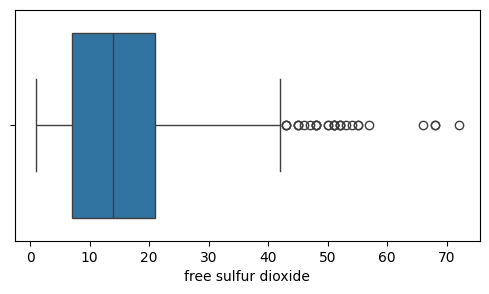

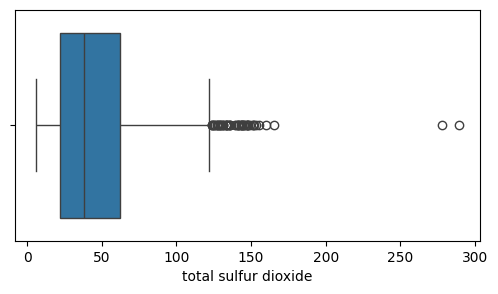

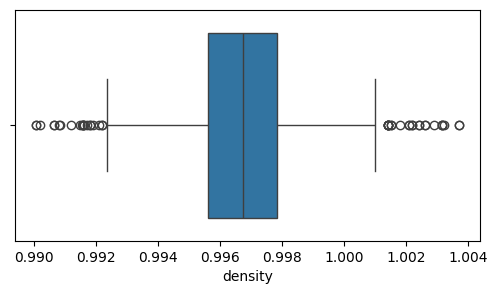

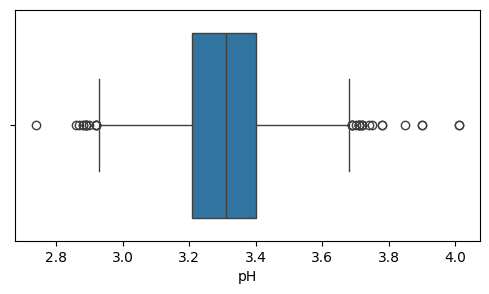

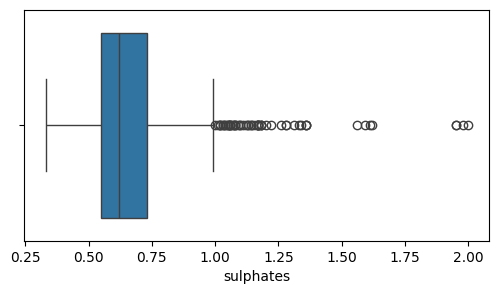

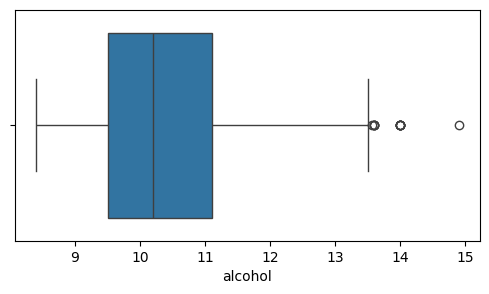

In [43]:
# Find Outliers
ls = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']


for col in ls:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x = df[col], data= df)
    print('\n')
    plt.show()

**Findings:** Best correlation are in between  
* Citric_acid = Fixed acidity
* density = fixed_acidity
* total_sulfer_dioxide = free_sulfure_dioxide

# Preprocess

## Normalisation

Use MinMax Scaler and StandardScaler Normalisation technique

To avoide overfittiong we firstly split data into train and test  data.   
Train data will be Fitted and transformed.  
but the test data will only be transofrmed

### Using MinMax Scaler

### Use the target column as numerical and find the accuracy:

In [44]:
# df = df.replace({'quality' : {
#                                     8 : 'Good',
#                                     7 : 'Good',
#                                     6 : 'Middle',
#                                     5 : 'Middle',
#                                     4 : 'Bad',
#                                     3 : 'Bad',
#         }}
# )

In [45]:
# Segregate the data into x and y 
X_temp = df.drop("quality", axis=1)
y = df['quality']

Use MinMax Scaler

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
# X.describe().T.style.background_gradient(axis=0, cmap='Purples')

In [47]:
# Split the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.30, random_state=43)

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}


svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)



print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

d:\Created_by_me\Learning\INeuron\Live\15_SVM\venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Tuned hyper parameters :  {'C': 1.0, 'gamma': 10}
accuracy :  0.6178634751773049


In [49]:
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)

In [50]:
y_pred_svc = svc.predict(X_test)

svc_score = round(svc.score(X_test, y_test), 3)
print('SVC Score : ', svc_score)

SVC Score :  0.594


Use StandardScaler

In [51]:
# Segregate the data into x and y 
x = df.drop("quality", axis=1)
y = df['quality']

In [52]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [53]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [54]:
# Normalize data to reduce the effect of learge numbers

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=43)

In [56]:
# Preprocess
# Scale data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale_train = scaler.fit_transform(train_x)
x_trian = pd.DataFrame(scale_train, columns=x.columns)

scaled_test = scaler.transform(test_x)
x_test = pd.DataFrame(scaled_test, columns=x.columns)

Train the model

In [57]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_trian, train_y)
pred_y = model.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score

accuracy_score(test_y, pred_y)

0.625

Since the accuracy is less, we can try tuning the hyper parameters to get the best model score

### Hyper Parameter Tuning

In [59]:
param_grid = {"C":[0.001, 0.01, 0.1, 1.0, 10, 100, 100], "gamma":[0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}
grid_search = GridSearchCV(SVC(), param_grid, cv = 10)
grid_search.fit(scale_train, train_y)

d:\Created_by_me\Learning\INeuron\Live\15_SVM\venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 100],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]})

In [60]:
# Get the best score and best parameters
print("Best Parameters", grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)

# verbose=3, n_jobs=-1

Best Parameters {'C': 100, 'gamma': 1.0}
Best Score :  0.6336068211068211


In [61]:
new_svc_model = SVC(C=1, gamma=0.5)

In [62]:
new_svc_model.fit(scale_train, train_y)

SVC(C=1, gamma=0.5)

In [63]:
new_pred_y = new_svc_model.predict(scaled_test)

In [64]:
accuracy_score(test_y, new_pred_y)

0.6333333333333333

### Convert the target column 'quality' into categorical string. 


In [65]:
df = df.replace({'quality' : {
                                    8 : 'Good',
                                    7 : 'Good',
                                    6 : 'Middle',
                                    5 : 'Middle',
                                    4 : 'Bad',
                                    3 : 'Bad',
        }}
)

In [66]:
# Segregate the data into x and y 
X_temp = df.drop("quality", axis=1)
y = df['quality']

Use MinMax Scaler

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
# X.describe().T.style.background_gradient(axis=0, cmap='Purples')

In [68]:
# Split the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.30, random_state=43)

In [69]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}


svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)



print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters :  {'C': 10, 'gamma': 100}
accuracy :  0.8476507092198581


In [70]:
svc = SVC(C = 10, gamma=100).fit(X_train, y_train)

In [71]:
y_pred_svc = svc.predict(X_test)

svc_score = round(svc.score(X_test, y_test), 3)
print('SVC Score : ', svc_score)

SVC Score :  0.838


Use StandardScaler

In [72]:
# Segregate the data into x and y 
x = df.drop("quality", axis=1)
y = df['quality']

In [73]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [74]:
y.head()

0    Middle
1    Middle
2    Middle
3    Middle
4    Middle
Name: quality, dtype: object

In [75]:
# Normalize data to reduce the effect of learge numbers

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=43)

In [76]:
# Preprocess
# Scale data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale_train = scaler.fit_transform(train_x)
x_trian = pd.DataFrame(scale_train, columns=x.columns)

scaled_test = scaler.transform(test_x)
x_test = pd.DataFrame(scaled_test, columns=x.columns)

Train the model

In [77]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_trian, train_y)
pred_y = model.predict(x_test)

In [78]:
from sklearn.metrics import accuracy_score

accuracy_score(test_y, pred_y)

0.8416666666666667

Since the accuracy is less, we can try tuning the hyper parameters to get the best model score

### Hyper Parameter Tuning

In [79]:
param_grid = {"C":[0.001, 0.01, 0.1, 1.0, 10, 100, 100], "gamma":[0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}
grid_search = GridSearchCV(SVC(), param_grid, cv = 10)
grid_search.fit(scale_train, train_y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 100],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]})

In [80]:
# Get the best score and best parameters
print("Best Parameters", grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)

# verbose=3, n_jobs=-1

Best Parameters {'C': 10, 'gamma': 1.0}
Best Score :  0.8642052767052768


In [81]:
new_svc_model = SVC(C=1, gamma=0.5)

In [82]:
new_svc_model.fit(scale_train, train_y)

SVC(C=1, gamma=0.5)

In [83]:
new_pred_y = new_svc_model.predict(scaled_test)

In [84]:
accuracy_score(test_y, new_pred_y)

0.8520833333333333

We tried trining the model with 2 senerios.
* 1st - Trained model with the target variable as numerical column where the data is ranged between 3-8.
* 2nd - Trained model with target variable converted to object format where we tried reducing the categorices by grouping the numers variables into good, middle, bad.  
we assumed: 
`
{8 : 'Good',
7 : 'Good',
6 : 'Middle',
5 : 'Middle',
4 : 'Bad',
3 : 'Bad'}`

**Findings:** Reducing the number of target categorical values, helps the model to better understand and train. It increse the model accuracy to a very great extend.  
Also using the StandardScaler() Normalisation technique perform better then MinMaxScaler.

### Use RandomForest Hyper parameter tuning techique

In [86]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVC



In [87]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Middle
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Middle
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Middle
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle


In [89]:
# reduce the target categorical values 
df = df.replace({'quality' : {
                                    8 : 'Good',
                                    7 : 'Good',
                                    6 : 'Middle',
                                    5 : 'Middle',
                                    4 : 'Bad',
                                    3 : 'Bad',
        }}
)

In [90]:
# Spred the data into x and y 
X = df.drop('quality', axis=1)
y = df['quality']

In [91]:
# Split the data into train and test 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=34)

In [92]:
# Noralise the data 
scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [103]:
# define the hyper parameters
params = {
    'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000], # Regularisation parameter
    'kernel': ['linear', 'rbf', 'poly'],  # kernel Type
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]     # Kernal Coefficient
}

In [104]:
# initialize the model 
svc = SVC()

In [105]:
# Initialize random search 
random_search = RandomizedSearchCV(
    estimator= svc,
    param_distributions=params,
    n_iter=10,
    cv=5
)

In [106]:
# Fit the train data
random_search.fit(scaled_x_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1.0, 10, 100,
                                              1000],
                                        'gamma': ['scale', 'auto', 0.001, 0.01,
                                                  0.1, 1.0, 10, 100, 1000],
                                        'kernel': ['linear', 'rbf', 'poly']})

In [107]:
# Get the best hyper parameters 
print("Best Parameters: ",random_search.best_params_)
print("Best Score: ",random_search.best_score_)

Best Parameters:  {'kernel': 'rbf', 'gamma': 10, 'C': 1000}
Best Score:  0.8579155989750159


In [108]:
# Train model with the new parameters 
new_svc_model = SVC(**random_search.best_params_)

In [109]:
# train the model 
new_svc_model.fit(scaled_x_train, y_train)

SVC(C=1000, gamma=10)

In [110]:
# predict the target variable
y_pred = new_svc_model.predict(scaled_x_test)

In [111]:
# compare the actual y_test data and predicted ata to Find the accuracy
accuracy_score(y_test, y_pred)

0.84375

**Conclusion:** If used the RandomSearchCV(), the model tends to perform well, with a bit high accuracy. 